# DIVI-Plot
Plots the DIVI Intesivregister data
## Imports, Definitions

In [10]:
import sys
import csv
import matplotlib.pyplot as plt
import numpy as np

dataFile = "/Users/cs/Desktop/Covid-Grafiken/DIVI-Rohdaten/zeitreihe-tagesdaten.csv"
gemeindeschlüssel = ['06434']

debugTable = False
printTable = False

EPOCH = np.datetime64('1970-01-01T00:00:00Z')
ONE_SECOND = np.timedelta64(1, 's')

/var/folders/ml/f8ks5wwh8xl5mj008k91f9nr0000gq/T/ipykernel_22155/4256746670.py:12: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  EPOCH = np.datetime64('1970-01-01T00:00:00Z')


## Open DIVI CSV File

In [13]:

with open(dataFile) as csvFile:
    try:
        dialect = csv.Sniffer().sniff(csvFile.read(1024*8), delimiters=',\t')
        if debugTable:
            print( 'delimiter:        ' + repr( dialect.delimiter.encode() ) )
            print( 'doublequote:      ' + repr( dialect.doublequote ) )
            if dialect.escapechar:
                print( 'escapechar:      ' + repr( dialect.escapechar.encode() ) )
            else:
                print( 'escapechar:       None')
            print( 'lineterminator:   ' + repr( dialect.lineterminator.encode() ) )
            print( 'quotechar:        ' + repr( dialect.quotechar ) )
            print( 'quoting:          ' + repr( dialect.quoting ) )
            print( 'skipinitialspace: ' + repr( dialect.skipinitialspace ) )

        csvFile.seek(0) # let's start over with this file, sniffing above already read some bytes
        dataReader = csv.reader(csvFile, dialect)

        if printTable:
            for row in dataReader:
                print( row )
        
        # convFunc = lambda d: ( np.datetime64(d) - EPOCH ) / np.timedelta64(1, 's')
        convFunc = lambda d: (np.datetime64(d) - EPOCH) / ONE_SECOND
        divi = np.genfromtxt(csvFile, delimiter=',', names=True, converters={0: convFunc})

    except csv.Error as e:
        sys.exit('file {}, {}'.format(dataFile, e))
    


## File Structure
### csv contents
All values seem to escaped as string charactes
| date | bundesland | gemeindeschl. | Standorte | Meldebereiche | n COVID | n COVID intensiv | Betten frei | … belegt | nur Erw. | frei nur Erw. |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| [0] | [1] | [2] | [3] | [4] | [5] | [6] | [7] | [8] | [9] | [10] |
| '2020-04-24' | '06' | '06434' | '3' | '3' | '5' | '2' | '4' | '28' | '28' | '4' |
| '2020-04-25' | '06' | '06434' | '3' | '3' | '5' | '2' | '4' | '27' | '27' | '4' |
| '2020-04-26' | '06' | '06434' | '3' | '3' | '5' | '2' | '4' | '27' | '27' | '4' |
| <small>```divi_date[]```</small>    | --   | <small>```divi_gschl[]```</small> | --  | --  | <small>```divi_n_covid[]```</small> | <small>```divi_n_intens[]```</small> | <small>```divi_beds_free[]```</small> | <small>```divi_beds_occ[]```</small> | --  | --  |



## Plot Data


TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

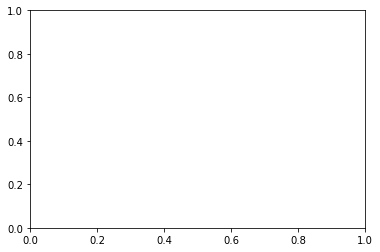

In [12]:
labels = [ 'Datum', 'Gemeinde', 'Covid-Fälle', '…auf Intensiv', 'Betten frei', '… belegt']

fig, ax = plt.subplots()

p1 = ax.bar()